Challenge Description
Company XYZ is an Online Travel Agent, such as Expedia, Booking.com, etc. They store their data in JSON ﬁles. Each row in the json shows all diﬀerent cities which have been searched for by a user within the same session (as well as some other info about the user). That is, if I go to company XYZ site and look for hotels in NY and SF within the same session, the corresponding JSON row will show my user id, some basic info about me and the two cities. You are given the following tasks: There was a bug in the code and one country didn't get logged. It just shows up as an empty ﬁeld (""). Can you guess which country was that? How? For each city, ﬁnd the most likely city to be also searched for within the same session. Travel sites are browsed by two kinds of users. Users who are actually planning a trip and users who just dream about a vacation. The ﬁrst ones have obviously a much higher purchasing intent. Users planning a trip often search for cities close to each other, while users who search for cities far away from each other are often just dreaming about a vacation. That is, a user searching for LA, SF and Las Vegas in the same session is much more likely to book a hotel than a user searching for NY, Paris, Kuala Lumpur (makes sense, right?). Based on this idea, come up with an algorithm that clusters sessions into two groups: high intent and low intent. Explain all assumptions you make along the way. 

In [3]:
import json
import pandas as pd
json_data=open("../TakeHomeChallenge/data/city_search.json").read()

jsdata = json.loads(json_data)
#data as a list
js_df=pd.DataFrame(jsdata)
city=js_df
#df as a data frame
 

In [3]:
city.head()

,cities,session_id,unix_timestamp,user
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"[[{'country': 'UK', 'joining_date': '2015-03-2..."
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"[[{'country': 'DE', 'joining_date': '2015-03-2..."
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"[[{'country': 'UK', 'joining_date': '2015-03-0..."
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"[[{'country': 'IT', 'joining_date': '2015-03-1..."
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"[[{'country': 'UK', 'joining_date': '2015-02-2..."


In [4]:
city["user"].head(1)

0    [[{'country': 'UK', 'joining_date': '2015-03-2...
Name: user, dtype: object

In [1]:
def parse_json(data):
    """ function to parse json data """
    session_id = []
    timestamp = []
    cities = []
    user_id = []
    joining_date = []
    country = []
    
    # parse each item
    for item in data:
        session_id.append(item['session_id'][0])
        timestamp.append(item['unix_timestamp'][0])
        cities.append(item['cities'][0])
        user_id.append(item['user'][0][0]['user_id'])
        joining_date.append(item['user'][0][0]['joining_date'])
        country.append(item['user'][0][0]['country'])
    
    # create DataFrame
    maps = {'session_id': session_id, 'timestamp': timestamp, 'cities': cities, 
            'user_id': user_id, 'joining_date': joining_date, 'country': country}
    columns=['session_id', 'timestamp', 'cities', 'user_id', 'joining_date', 'country']
    
    return pd.DataFrame(maps, columns=columns)

In [4]:
#referenced https://github.com/JifuZhao/DS-Take-Home/blob/master/13.%20Json%20City%20Similarities.ipynb 
with open('./data/city_search.json', 'r') as f:
    json_data = json.load(f)

data = parse_json(json_data)
data['joining_date'] = pd.to_datetime(data['joining_date'])
data.head()

,session_id,timestamp,cities,user_id,joining_date,country
0,X061RFWB06K9V,1442503708,"New York NY, Newark NJ",2024,2015-03-22,UK
1,5AZ2X2A9BHH5U,1441353991,"New York NY, Jersey City NJ, Philadelphia PA",2853,2015-03-28,DE
2,SHTB4IYAX4PX6,1440843490,San Antonio TX,10958,2015-03-06,UK
3,JBRB8MZGTX3M4,1427268063,Edmonton AB,7693,2015-03-12,IT
4,YJCMPURC2FL9C,1430559067,"Phoenix AZ, Houston TX",7506,2015-02-28,UK


In [6]:
data.groupby("country").size().sort_values()

country
IT    1882
ES    1953
FR    2298
      2820
UK    3555
DE    3638
US    3876
dtype: int64

In [7]:
data.loc[data["country"]=="",:]

,session_id,timestamp,cities,user_id,joining_date,country
6,YOVUIM79SGS5Y,1443171887,"Montreal QC, Chicago IL",8831,2015-03-02,
7,SHXEY67QWKP9K,1431766104,"Calgary AB, New York NY",587,2015-03-16,
9,UY49RTVRX3GL7,1439104667,New York NY,5995,2015-03-21,
19,YQAEPPG214CNU,1439713760,"Toronto ON, New York NY",957,2015-03-30,
37,51H4C2DEYXG5D,1436444694,New York NY,5433,2015-03-05,
49,IZMJ8EDM6YA9U,1434954513,New York NY,6236,2015-03-14,
59,GZ121D8QYYVTN,1425603472,"Toronto ON, New York NY",1673,2015-03-05,
63,6NQAZ7BZCSGSR,1442217076,"Los Angeles CA, Long Beach CA",7018,2015-03-31,
64,M61VCMQLURXDU,1429688058,OTTAWA ON,8617,2015-03-20,
68,4IUT15ZMIYL9R,1437207288,"Chicago IL, Milwaukee WI",10940,2015-03-20,


In [8]:
data.loc[data["country"]=="ES",:]

,session_id,timestamp,cities,user_id,joining_date,country
5,LKOKP80QD6BEO,1434199991,San Diego CA,3743,2015-03-04,ES
24,8RN385ID8CR48,1435810265,Los Angeles CA,7688,2015-03-30,ES
25,EEBNPTA77L6YT,1425299294,"San Antonio TX, Corpus Christi TX, Arlington T...",9825,2015-03-01,ES
32,ND7U4RZY052AQ,1435248246,"San Diego CA, Santa Ana CA",6133,2015-03-13,ES
33,KR6100BY46189,1440756721,"Phoenix AZ, Montreal QC",4592,2015-03-02,ES
69,28Y85A80R6E94,1440589023,"Jacksonville FL, Montreal QC",1752,2015-03-15,ES
86,H4OO434E7OIA2,1434452431,Detroit MI,8691,2015-03-16,ES
98,MY9OGNXHYON3P,1428395724,San Jose CA,666,2015-03-18,ES
100,TQE59RE3DKF25,1432812090,Los Angeles CA,4289,2015-03-02,ES
103,HM3C2F946LAD3,1438511755,"Jacksonville FL, Miami FL",6200,2015-03-10,ES


In [13]:
data['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'count'})

US    3876
DE    3638
UK    3555
      2820
FR    2298
ES    1953
IT    1882
Name: country, dtype: int64

In [21]:
data["time"]=pd.to_datetime(data['timestamp'], unit='s')
data["hour"]=data["time"].apply(lambda x:x.hour)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
count= data['hour'].value_counts().reset_index().rename(columns={'index': 'hour', 'hour': 'count'}).sort_values(by="hour")
count.head()

,hour,count
22,0,212
23,1,194
21,2,214
19,3,294
15,4,382


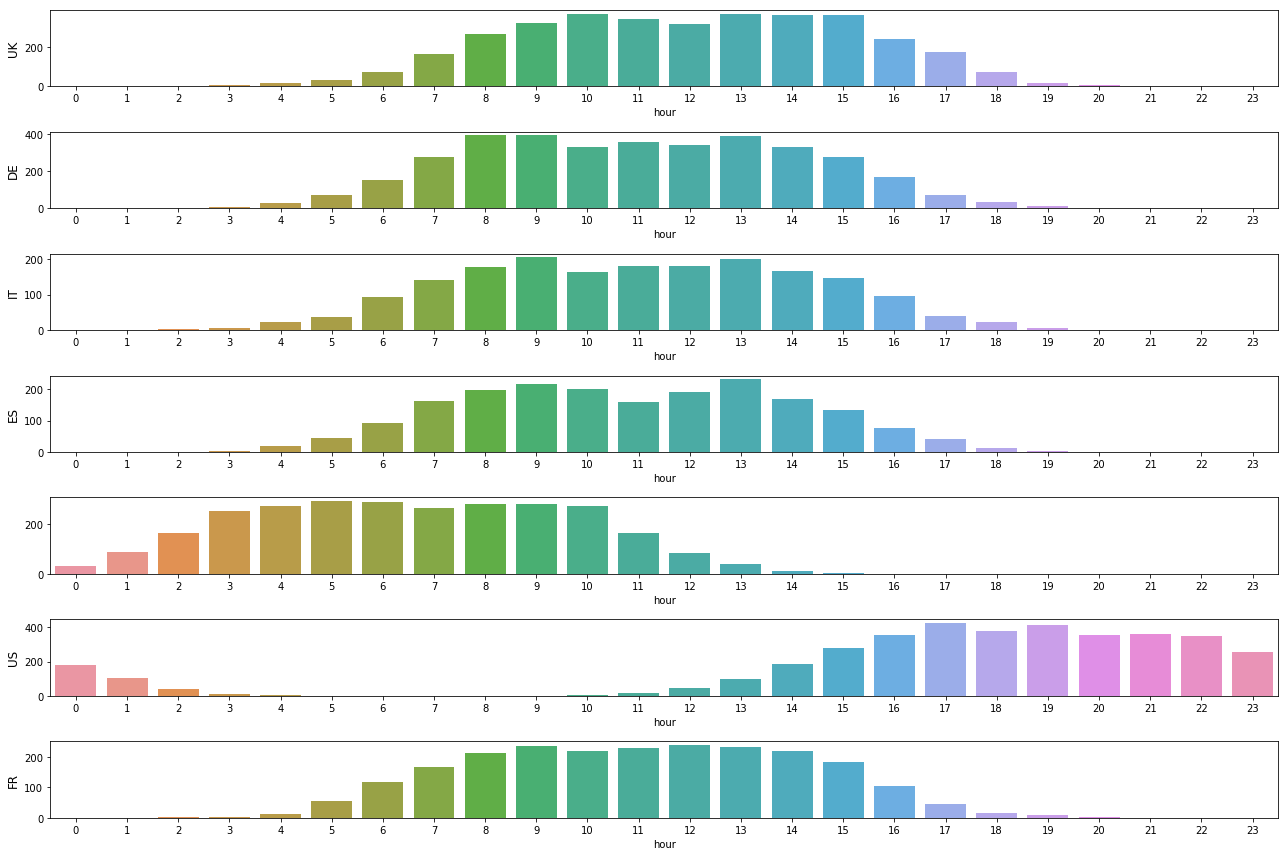

In [49]:
country=data["country"].unique()
leng=len(country)
order=range(24)
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(18, 12))
for i in range(leng):
    country_i=country[i]     
    sns.countplot(x='hour', data=data[data['country'] == country[i]], ax=ax[i],order=order)
    ax[i].set_ylabel(country[i], fontsize=12)
plt.tight_layout()
plt.show()

# Question 2
For each city, find the most likely city to be also searched for within the same session.

In [ ]:
#create city similarities matrix 